# APLICACIÓN EN SÍNTESIS Y MEDICIÓN DE PELÍCULA DE Ag
1/12/2024

Hugo Ernesto Cárdenas Alcaraz

<img src="https://innovacionacademica.iteso.mx/documents/27014/202031/Logo-ITESO-MinimoV.png"  align="center"/>

## INTRODUCCIÓN

La síntesis de nanopartículas (NPs) de plata en ITESO, normalmente se realiza con métodos químicos, los cuales son menos costosos, pero tienen ciertas restricciones como precisión, tamaños de NPs posibles, entre otros. Debido al costo y mantenimineto, ITESO no tiene el privilegio de tener uno de estos dispositivos; no obstante, considero que los simuladores son excelentes herramientas para adentrarnos al menos un poco en el campo de investigación, otorgándonos una noción de lo que es utilizar ciertos dispositivos o maquinaria, como lo pueden ser simuladores del SEM, TEM, etc.

Varios de los estudiantes de nanotecnología se enfocan bastante en la electrónica, la cual hace uso de estos dispositivos más costosos, la utilización y creación de los mismos es crucial para poder desarrollar sus habilidades y entendimiento de los mismos. 

Mejorando así, el nivel ducativo, creativo y directamente del departamento, ya que no solo serían síntesis siguiendo un recetario que podrían realizarse en un laboratorio de nivel preparatoria, ofertando un nivel de conocimiento más amplio y significativo.


## MARCO TEÓRICO


#### Laser Ablation

El método de síntesis de ablación Láser consiste en la desintegración de un bloque de materia prima (plata en este caso) y repetidos pulsos de un láser de anta intensidad, lo cual permite  el desprendimiento de nanopartículas (NPs) de plata y se mantienen en la solución, formando un coloide. Para poder regular el tamaño de nanopartículas producidas por estos. Estas nanopartículas pueden ser depositadas en el sustrato de Si, creando una películas de Ag. Para regular el tamaño de las nanopartículas, se debe ajustar la cantidad de pulsaciones del láser, entre más largas las pulsaciones, más pequeñas las NPs

## OBJETIVOS
#### General
* Se busca poder simular y medir la creación de una aproximación de película de Ag a partir de ablación laser
#### Específico
* Realizar un grid de alturas del cual se calcularán sus máximos para poder obtener un promedio de la película y así aproximar sus propiedades. 

## MODELO
$$Hi_{max}$$
$$\text{H} = \sum_{i=1}^n (Hi_{max})$$

## PELÍCULA DE Ag 

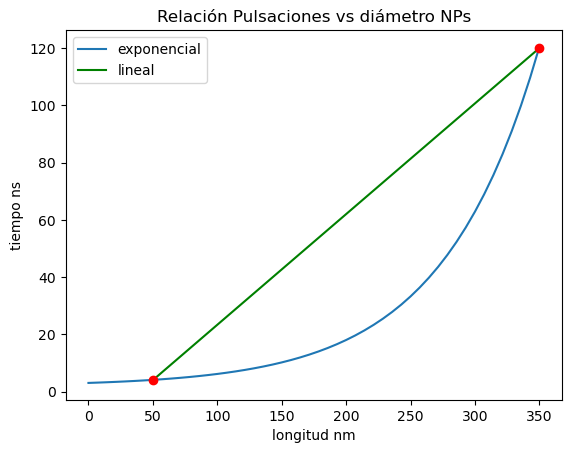

In [294]:
#proporción pulsaciones
# proporción error
def f(x):
    return np.exp(0.0133*x+0.12) + 1.9
xd = np.linspace(0,350)
plt.plot(xd,f(xd),label = "exponencial")
plt.plot([50,350],[4,120], c = "g", label="lineal")
plt.scatter([50,350],[4,120], c= "r", zorder = 2)


plt.title("Relación Pulsaciones vs diámetro NPs")
plt.xlabel("longitud nm")
plt.ylabel("tiempo ns")
plt.legend()
plt.show()
pendiente_Pul = (120-4)/(350-50)

Se aproximó una curva exponencial entre los puntos, acorde a la teoría.

In [521]:
import numpy as np
import matplotlib.pyplot as plt

#formacion de nanoparticulas de Ag
ns = 88
n = 1000000 # No. particulas
m = f(ns)*0.05 # error 1%
x = 100
y = 100
def laser(ns):
    diametro = f(ns) + np.random.choice([-m,m,0],p=[0.005,0.005,0.99])
    return diametro
    
def reps(n):
    lista_laser =[]
    for i in range(n):
        dia = laser(ns)
        lista_laser.append(dia)
    return lista_laser
lista_laser = reps(n)

def grid(x,y):
    T = np.zeros((x,y))
    return T

def arrojar(x,y,n): #establecer tamaño de película
    T = np.zeros((x,y))
    lista = lista_laser
    n = len(lista_laser)
    for i in range(n):
        T[np.random.randint(0,x),np.random.randint(0,y)] = T[np.random.randint(0,x),np.random.randint(0,y)] + lista_laser[i]
        
    return T

In [522]:
pel = arrojar(x,y,n)
pel

array([[636.43759552, 559.23494806, 614.30063568, ..., 564.21576403,
        520.77198033, 526.0295083 ],
       [575.56095595, 614.57734767, 536.54456422, ..., 442.73919688,
        503.89254845, 653.0403154 ],
       [531.28703626, 520.49526834, 603.50886775, ..., 531.28703626,
        619.83487564, 464.87615673],
       ...,
       [498.08159649, 574.73081995, 553.7007081 , ..., 570.30342798,
        597.42120379, 508.87336442],
       [686.24575517, 548.16646814, 536.82127622, ..., 569.75000399,
        558.95823606, 592.16367583],
       [558.95823606, 581.6486199 , 559.51166006, ..., 580.81848391,
        492.54735653, 531.01032426]])

In [503]:
vx = []
vy = []
for i in range(x):
    vx.append(i)
for i in range(y):
    vy.append(i)
v_x = np.array(vx).reshape([-1,1])
v_y = np.array(vy).reshape([-1,1])
X_hyper = np.hstack((v_x, v_y))
valores_z = np.array(pel[i])
valores_z
promedios = []
for i in range(x):
    prom = pel[i].max()
    promedios.append(prom)
avg_grosor_pel = np.array(promedios).sum()/x
print ("grosor película: " + str(avg_grosor_pel) + " nm")

grosor película: 671.1289787149889 nm


## BIBLIOGRAFÍA

* Jiaxin Yu et al(2017).
Size control of nanoparticles by multiple-pulse laser ablation,
Applied Surface Scienc1.094.
(https://www.sciencedirect.com/science/article/pii/S016943321
* Anugop Balachandran et al (2022).
Nanoparticle production via laser ablation synthesis in solution method and printed electronic application - A brief revie.100646.
(https://www.sciencedirect.com/science/article/pii/S2590123022003164)
7300715)df